In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('/Users/Bose/Desktop/GitHub/Kaggle/Data/train.csv')

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [6]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): ['Id',
  'MSSubClass',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodAdd',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'TotRmsAbvGrd',
  'Fireplaces',
  'GarageCars',
  'GarageArea',
  'WoodDeckSF',
  'OpenPorchSF',
  'EnclosedPorch',
  '3SsnPorch',
  'ScreenPorch',
  'PoolArea',
  'MiscVal',
  'MoSold',
  'YrSold',
  'SalePrice'],
 dtype('float64'): ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'],
 dtype('O'): ['MSZoning',
  'Street',
  'Alley',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1',
  'Condition2',
  'BldgType',
  'HouseStyle',
  'RoofStyle',
  'RoofMatl',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure

In [7]:
list(df.select_dtypes(include=['int64']).columns)

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [8]:
round(df.select_dtypes(include=['int64']).describe(),2)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.0,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,730.50,56.9,10516.83,6.10,5.58,1971.27,1984.87,443.64,46.55,567.24,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2
std,421.61,42.3,9981.26,1.38,1.11,30.20,20.65,456.10,161.32,441.87,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5
min,1.00,20.0,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
25%,365.75,20.0,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,223.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0
50%,730.50,50.0,9478.50,6.00,5.00,1973.00,1994.00,383.50,0.00,477.50,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0
75%,1095.25,70.0,11601.50,7.00,6.00,2000.00,2004.00,712.25,0.00,808.00,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0
max,1460.00,190.0,215245.00,10.00,9.00,2010.00,2010.00,5644.00,1474.00,2336.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0


In [9]:
dfInt2 = df.select_dtypes(include=['int64', 'float64'])
round(dfInt2.iloc[:,1:11].describe(),2)

/Users/Bose/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2
count,1460.0,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00
mean,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55
std,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32
min,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00
25%,20.0,NaN,7553.50,5.00,5.00,1954.00,1967.00,NaN,0.00,0.00
50%,50.0,NaN,9478.50,6.00,5.00,1973.00,1994.00,NaN,383.50,0.00
75%,70.0,NaN,11601.50,7.00,6.00,2000.00,2004.00,NaN,712.25,0.00
max,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00


In [10]:
round(df.select_dtypes(include=['float64']).describe(),2)

/Users/Bose/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.00,1452.00,1379.00
mean,70.05,103.69,1978.51
std,24.28,181.07,24.69
min,21.00,0.00,1900.00
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,313.00,1600.00,2010.00


In [11]:
round(df['SalePrice'].describe(),0)

count      1460.0
mean     180921.0
std       79443.0
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: float64

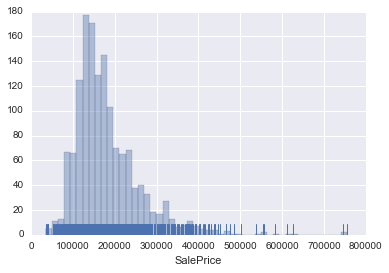

In [12]:
sns.distplot(df['SalePrice'], kde=False, rug=True);

(array([   9.,    6.,   37.,  122.,   83.,  128.,  261.,  223.,  139.,  452.]),
 array([ 1872. ,  1885.8,  1899.6,  1913.4,  1927.2,  1941. ,  1954.8,
         1968.6,  1982.4,  1996.2,  2010. ]),
 <a list of 10 Patch objects>)

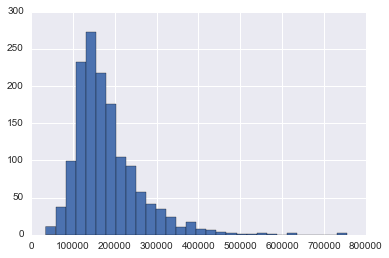

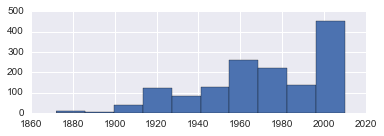

In [13]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.hist(df['SalePrice'], bins=30)
fig=plt.figure()
ax=fig.add_subplot(2,1,1)
ax.hist(df['YearBuilt'], bins=10)

In [14]:
dfInt = df.select_dtypes(include=['int64'])

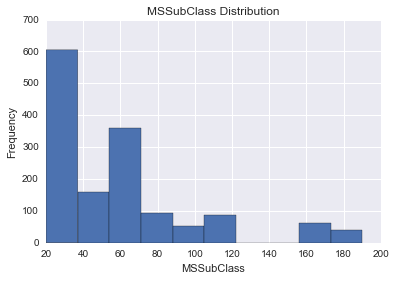

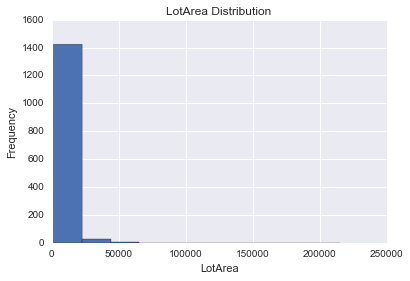

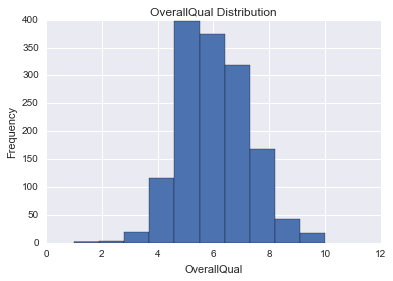

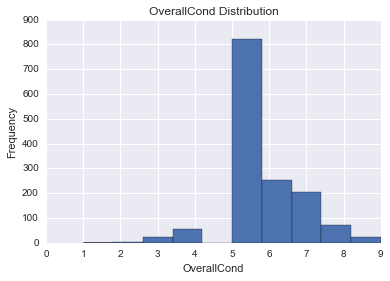

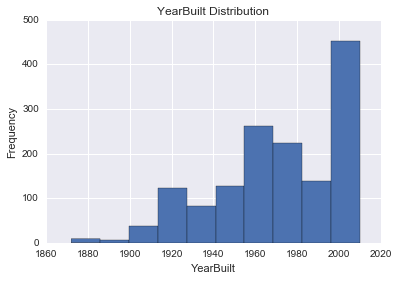

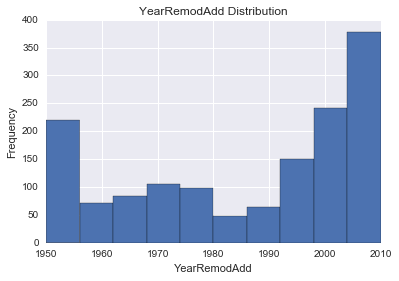

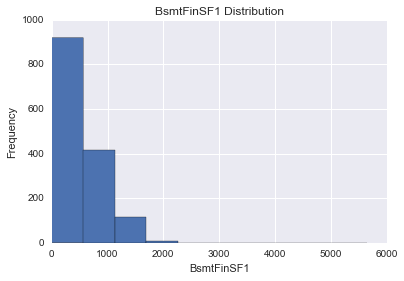

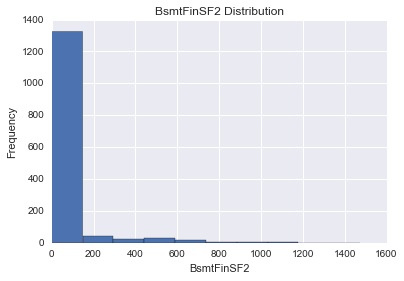

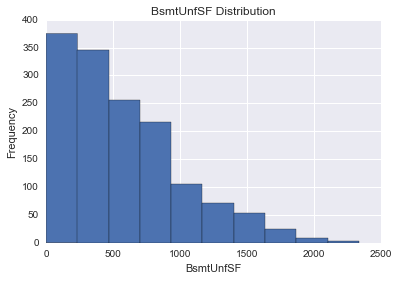

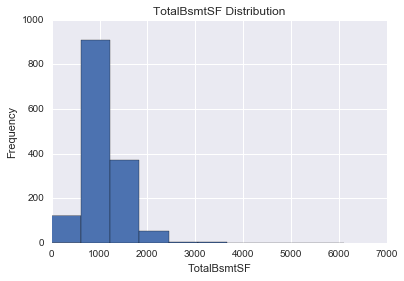

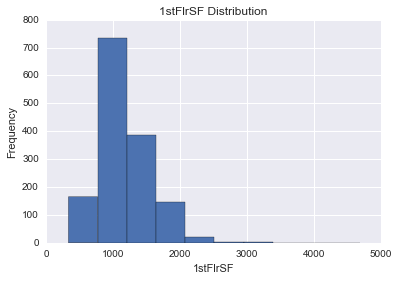

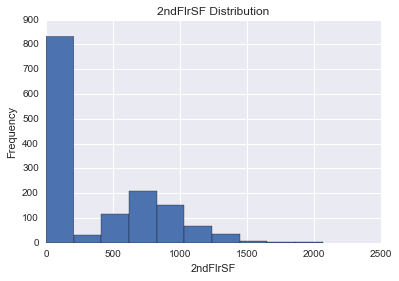

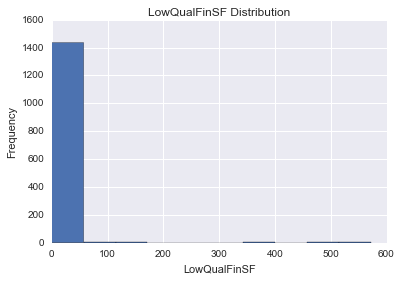

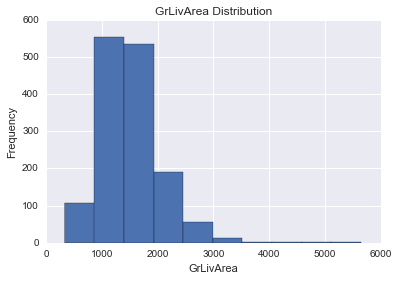

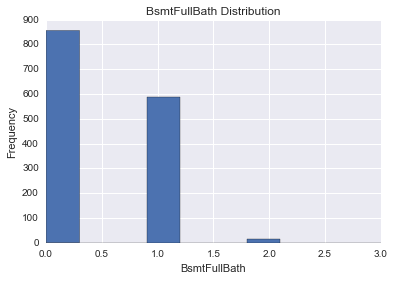

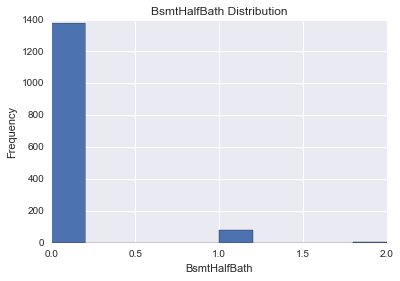

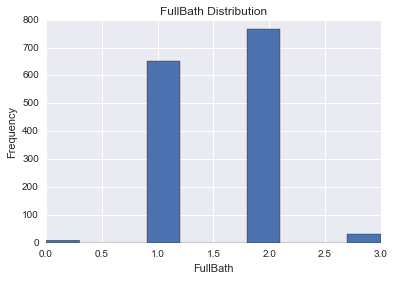

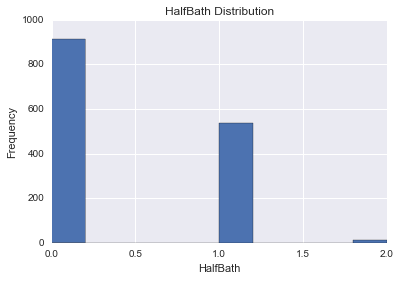

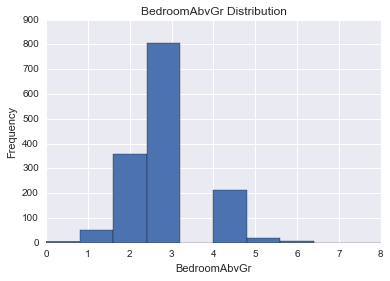

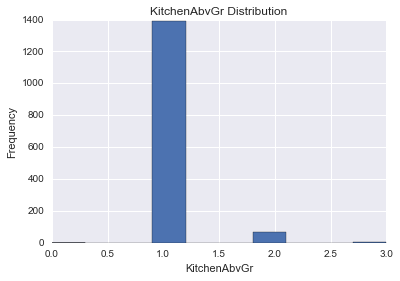

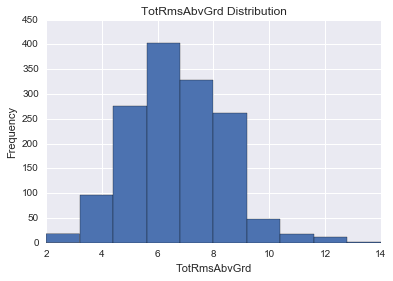

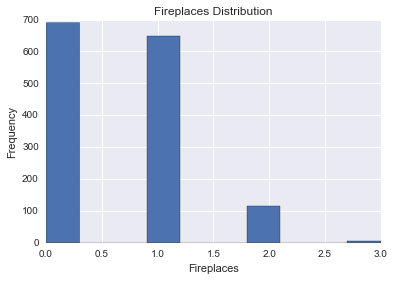

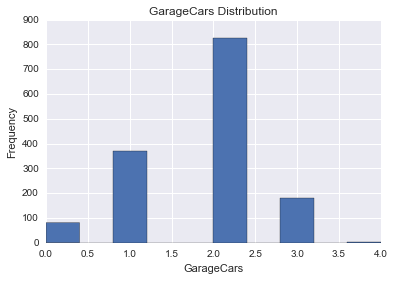

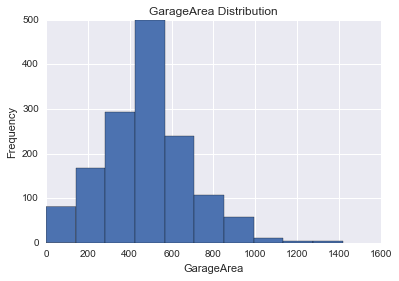

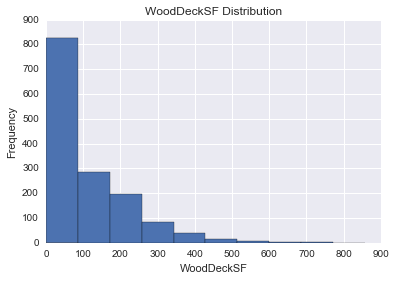

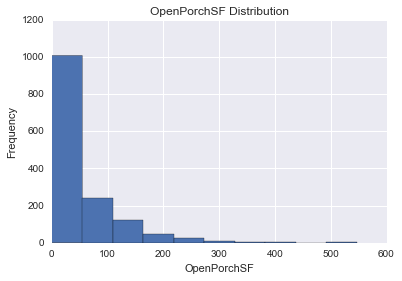

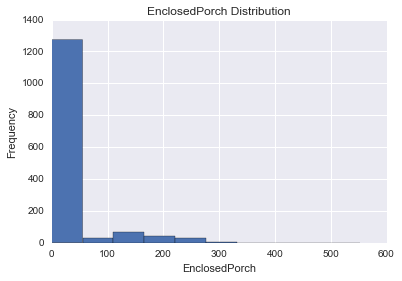

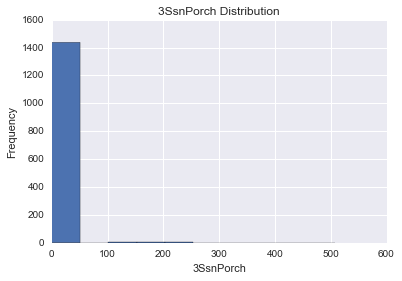

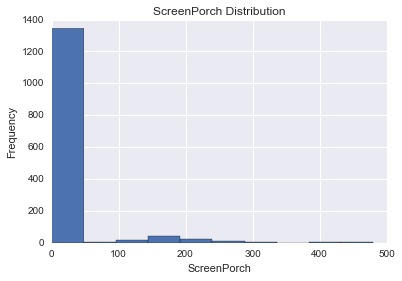

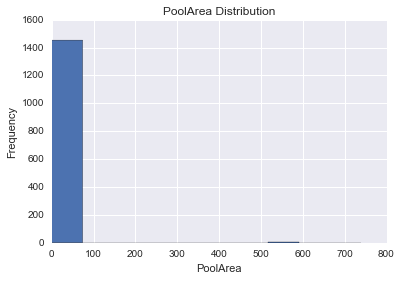

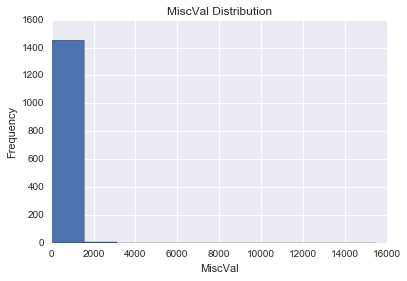

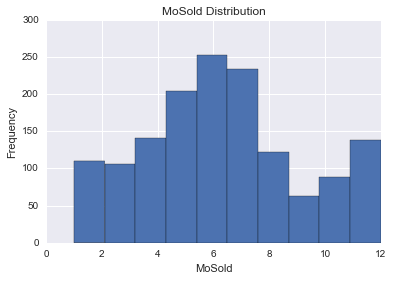

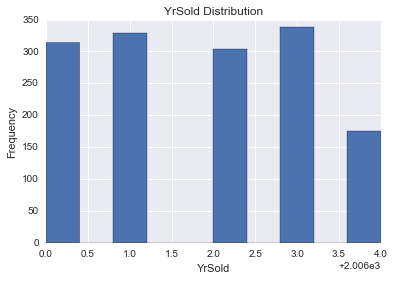

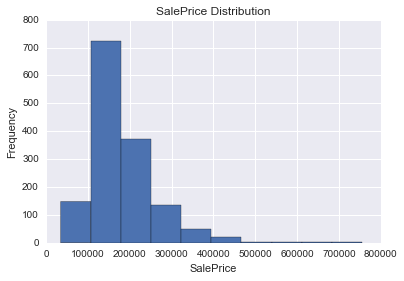

In [15]:
var = list(dfInt.columns)
i=1
for i in range(1,len(var)):
    plt.hist(df[var[i]], alpha = 1)
    plt.title(var[i]+ ' Distribution')
    plt.xlabel(var[i])
    plt.ylabel('Frequency')
    #plt.figure()
    plt.show()    

(array([  11.,   38.,   99.,  232.,  273.,  218.,  176.,  104.,   93.,
          58.,   42.,   35.,   24.,   10.,   17.,    8.,    7.,    4.,
           2.,    1.,    1.,    2.,    1.,    0.,    2.,    0.,    0.,
           0.,    0.,    2.]),
 array([  34900.        ,   58903.33333333,   82906.66666667,
         106910.        ,  130913.33333333,  154916.66666667,
         178920.        ,  202923.33333333,  226926.66666667,
         250930.        ,  274933.33333333,  298936.66666667,
         322940.        ,  346943.33333333,  370946.66666667,
         394950.        ,  418953.33333333,  442956.66666667,
         466960.        ,  490963.33333333,  514966.66666667,
         538970.        ,  562973.33333333,  586976.66666667,
         610980.        ,  634983.33333333,  658986.66666667,
         682990.        ,  706993.33333333,  730996.66666667,  755000.        ]),
 <a list of 30 Patch objects>)

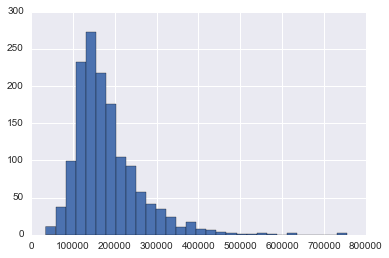

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
x=df['SalePrice']
plt.hist(x, normed=False, bins=30)

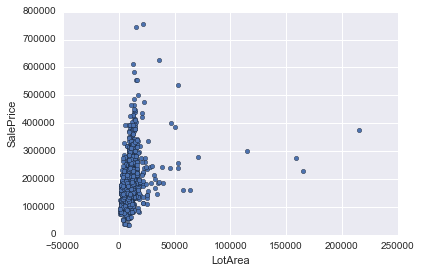

In [17]:
var = 'LotArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

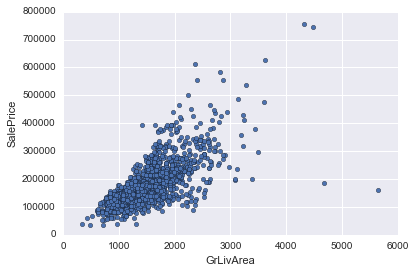

In [18]:
var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

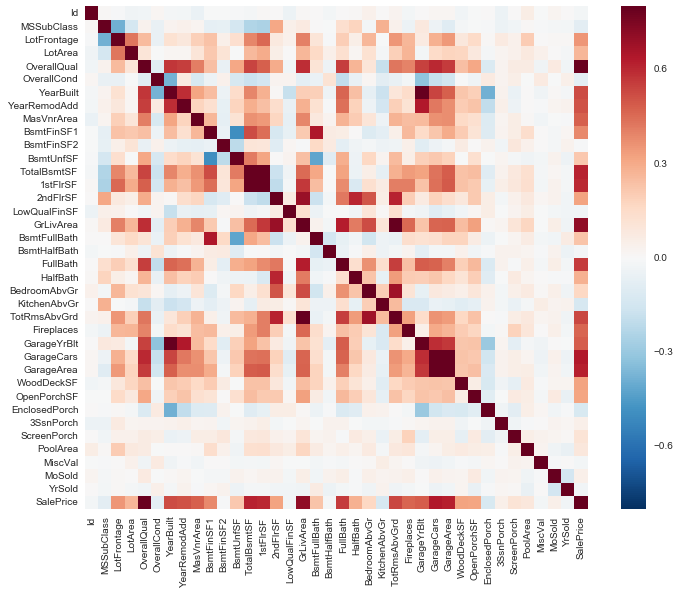

In [19]:
import matplotlib.pyplot as plt
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, square=True);

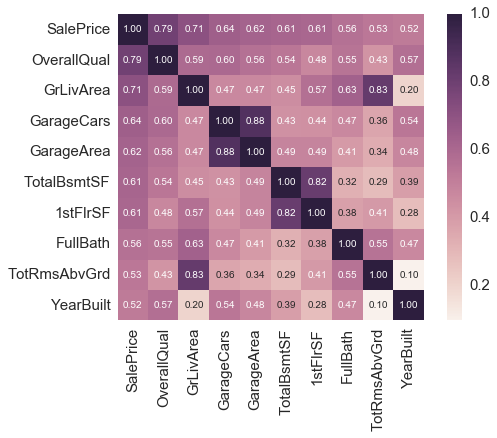

In [20]:
k = 10 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [21]:
k = 5
cols = df.corr().nlargest(k, 'SalePrice')['SalePrice'].index

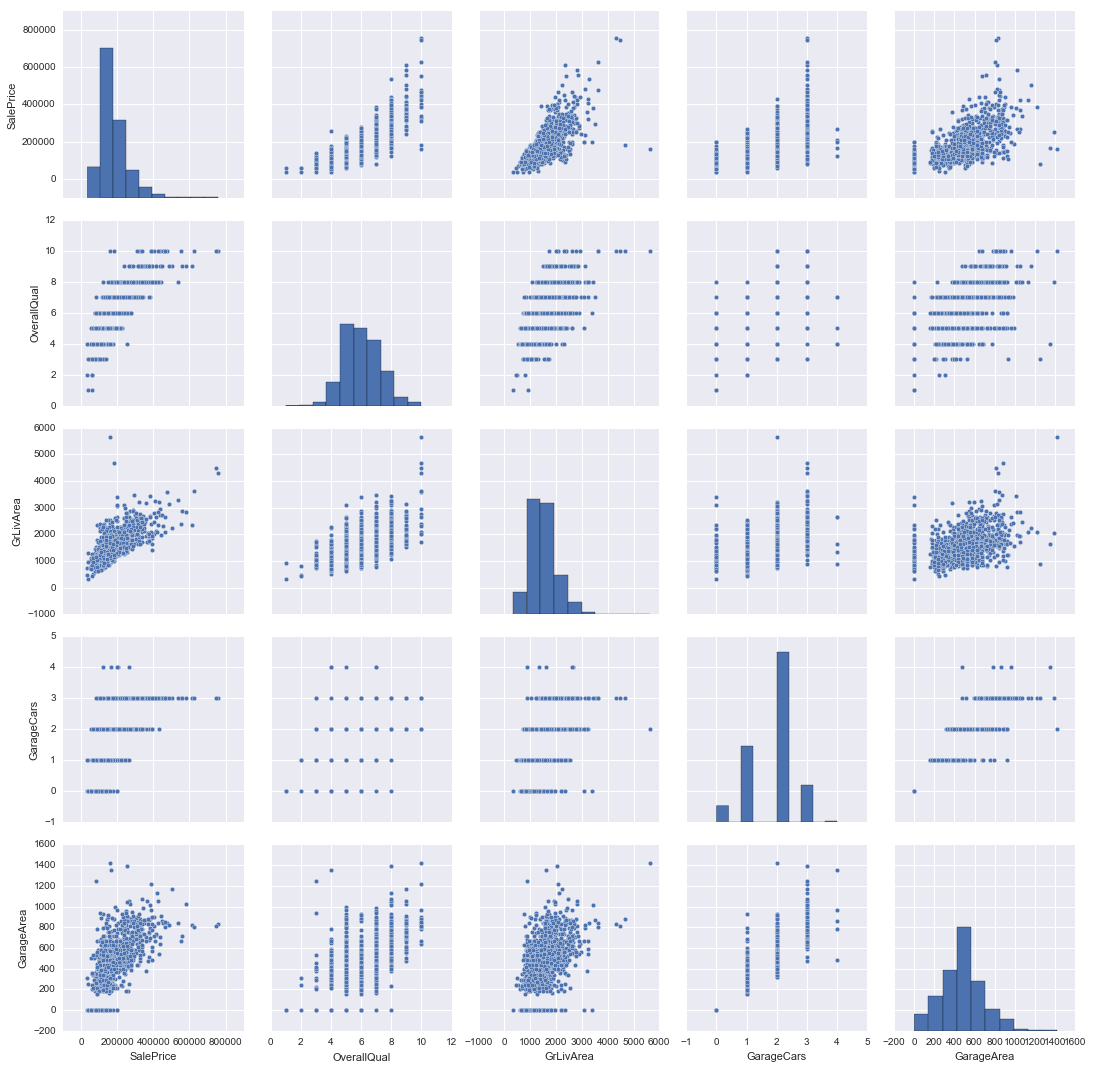

In [22]:
sns.set()
sns.pairplot(df[cols], size = 3)
plt.show();

In [23]:
total=df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missingData= pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
df2 = missingData.loc[(missingData != 0).all(axis=1), :]
df2

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


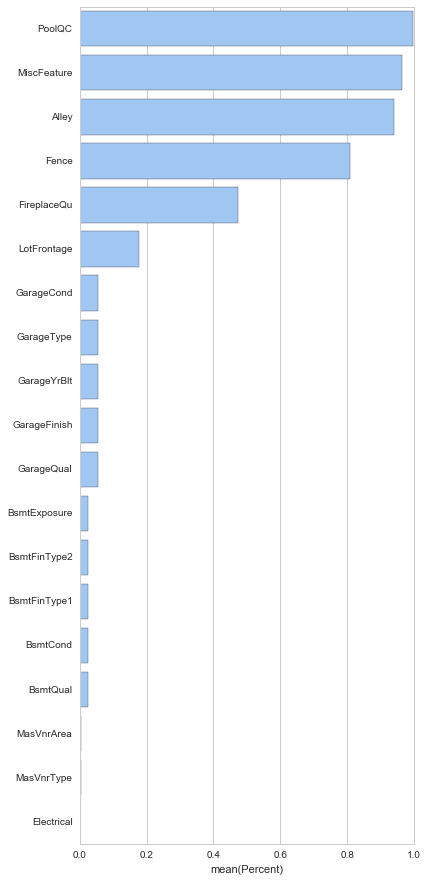

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x=df2['Percent'], y=list(df2.index), data=missingData,
            label="Total", color="b")

In [25]:
dfOld = df
df = df.drop(missingData[missingData['Total']>1].index,1)

In [26]:
df = df.drop(df.loc[df['Electrical'].isnull()].index)
df.isnull().sum().max()

0

In [27]:
dfPick=df.iloc[:,1:5]
dfPick.to_pickle('pick.pkl')

In [31]:
df.isnull().sum().max()

0

In [34]:
import statsmodels.formula.api as sm

In [54]:
intVar = df.select_dtypes(include=['int64']).columns

In [58]:
all_columns = "+".join(intVar - ["SalePrice"] - ["2ndFlrSF"])

/Users/Bose/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  if __name__ == '__main__':


In [59]:
all_columns

'1stFlrSF+3SsnPorch+BedroomAbvGr+BsmtFinSF1+BsmtFinSF2+BsmtFullBath+BsmtHalfBath+BsmtUnfSF+EnclosedPorch+Fireplaces+FullBath+GarageArea+GarageCars+GrLivArea+HalfBath+Id+KitchenAbvGr+LotArea+LowQualFinSF+MSSubClass+MiscVal+MoSold+OpenPorchSF+OverallCond+OverallQual+PoolArea+ScreenPorch+TotRmsAbvGrd+TotalBsmtSF+WoodDeckSF+YearBuilt+YearRemodAdd+YrSold'

In [71]:
int4 = df.select_dtypes(include=['int64']).columns

In [64]:
#my_formula = 'SalePrice ~ ' + all_columns
result = sm.ols(formula= "SalePrice ~ PoolArea + MoSold + YrSold", data=df).fit()

In [76]:
all_columns = " + ".join(int4 - ["SalePrice"])
my_formula = "SalePrice ~ " + all_columns

/Users/Bose/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  if __name__ == '__main__':


In [78]:
result2 = sm.ols(formula= my_formula, data=df).fit()

SyntaxError: invalid syntax (<unknown>, line 1)

In [77]:
my_formula

'SalePrice ~ 1stFlrSF + 2ndFlrSF + 3SsnPorch + BedroomAbvGr + BsmtFinSF1 + BsmtFinSF2 + BsmtFullBath + BsmtHalfBath + BsmtUnfSF + EnclosedPorch + Fireplaces + FullBath + GarageArea + GarageCars + GrLivArea + HalfBath + Id + KitchenAbvGr + LotArea + LowQualFinSF + MSSubClass + MiscVal + MoSold + OpenPorchSF + OverallCond + OverallQual + PoolArea + ScreenPorch + TotRmsAbvGrd + TotalBsmtSF + WoodDeckSF + YearBuilt + YearRemodAdd + YrSold'

In [79]:
df.to_csv('check.csv', sep='\t')

In [80]:
df.to_csv('out.csv')